In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import ast

In [3]:
df = pd.read_csv('tweet-svm/svm2_log.csv')

In [4]:
# score_reportを辞書型に変換して読み込み
report_dic = ast.literal_eval(df['score_report'][0])
print(report_dic)

{'neg': {'precision': 0.3333333333333333, 'recall': 0.2857142857142857, 'f1-score': 0.30769230769230765, 'support': 7}, 'neu': {'precision': 0.36363636363636365, 'recall': 0.3076923076923077, 'f1-score': 0.33333333333333337, 'support': 13}, 'pos': {'precision': 0.42857142857142855, 'recall': 0.5454545454545454, 'f1-score': 0.4799999999999999, 'support': 11}, 'accuracy': 0.3870967741935484, 'macro avg': {'precision': 0.3751803751803752, 'recall': 0.37962037962037964, 'f1-score': 0.37367521367521367, 'support': 31}, 'weighted avg': {'precision': 0.37983521854489594, 'recall': 0.3870967741935484, 'f1-score': 0.37958643507030604, 'support': 31}}


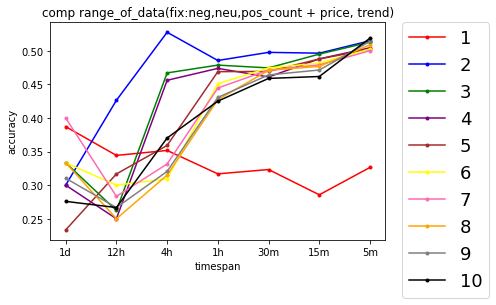

In [5]:
# range_of_dataの比較
# 縦軸：accuracy, 横軸：timespan ,定数：kind_of_data

alist = {1:'neg_count, neu_count, pos_count + end_price, trend',
         2:'com_ave, tweet_count + end_price, trend',
         3:'neg_count, neu_count, pos_count + com_ave, tweet_count + end_price, trend',
         4:'neg_count, neu_count, pos_count',
         5:'com_ave, tweet_count',
         6:'neg_count, neu_count, pos_count + com_ave, tweet_count',
         7:'end_price, trend'}

df_list = []

df = pd.read_csv('tweet-svm/svm2_log.csv',usecols=['timespan','kind_of_data','accuracy','range_of_data'])
df = df.query('kind_of_data == "neg_count, neu_count, pos_count + end_price, trend"')
df = df.drop(columns=['kind_of_data'])
for i in range (1,11):
    df_list.append(df.groupby("range_of_data").get_group(i))

#1つ目の表示するデータを用意
k=0
x = df_list[k]['timespan']
y1 = df_list[k]['accuracy']
y2 = df_list[k+1]['accuracy']
y3 = df_list[k+2]['accuracy']
y4 = df_list[k+3]['accuracy']
y5 = df_list[k+4]['accuracy']
y6 = df_list[k+5]['accuracy']
y7 = df_list[k+6]['accuracy']
y8 = df_list[k+7]['accuracy']
y9 = df_list[k+8]['accuracy']
y10 = df_list[k+9]['accuracy']

#plt.xticks(['1d','12h','4h','1h','30m','15m','5m'])

plt.plot(x, y1,label="1", color = 'red', marker = '.')
plt.plot(x, y2,label="2", color = 'blue', marker = '.')
plt.plot(x, y3,label="3", color = 'green', marker = '.')
plt.plot(x, y4,label="4", color = 'purple', marker = '.')
plt.plot(x, y5,label="5", color = 'brown', marker = '.')
plt.plot(x, y6,label="6", color = 'yellow', marker = '.')
plt.plot(x, y7,label="7", color = 'hotpink', marker = '.')
plt.plot(x, y8,label="8", color = 'orange', marker = '.')
plt.plot(x, y9,label="9", color = 'gray', marker = '.')
plt.plot(x, y10,label="10", color = 'black', marker = '.')

plt.xlabel("timespan")
plt.ylabel("accuracy")
plt.title("comp range_of_data(fix:neg,neu,pos_count + price, trend)")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

#グラフ表示
plt.show()

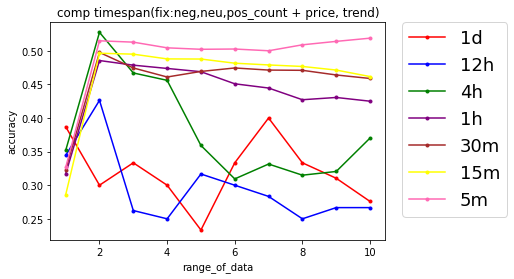

In [6]:
# timespanの比較
# 縦軸：accuracy, 横軸：data_range, 定数：kind_of_data

alist = {1:'neg_count, neu_count, pos_count + end_price, trend',
         2:'com_ave, tweet_count + end_price, trend',
         3:'neg_count, neu_count, pos_count + com_ave, tweet_count + end_price, trend',
         4:'neg_count, neu_count, pos_count',
         5:'com_ave, tweet_count',
         6:'neg_count, neu_count, pos_count + com_ave, tweet_count',
         7:'end_price, trend'}
tlist = ['1d','12h','4h','1h','30m','15m','5m']
df_list = []

df = pd.read_csv('tweet-svm/svm2_log.csv',usecols=['timespan','kind_of_data','accuracy','range_of_data'])
df = df.query('kind_of_data == "neg_count, neu_count, pos_count + end_price, trend"')
df = df.drop(columns=['kind_of_data'])
for timespan in tlist:
    df_list.append(df.groupby("timespan").get_group(f'{timespan}'))

#1つ目の表示するデータを用意
k=0
x = df_list[k]['range_of_data']
y1 = df_list[k]['accuracy']
y2 = df_list[k+1]['accuracy']
y3 = df_list[k+2]['accuracy']
y4 = df_list[k+3]['accuracy']
y5 = df_list[k+4]['accuracy']
y6 = df_list[k+5]['accuracy']
y7 = df_list[k+6]['accuracy']

plt.plot(x, y1,label="1d", color = 'red', marker = '.')
plt.plot(x, y2,label="12h", color = 'blue', marker = '.')
plt.plot(x, y3,label="4h", color = 'green', marker = '.')
plt.plot(x, y4,label="1h", color = 'purple', marker = '.')
plt.plot(x, y5,label="30m", color = 'brown', marker = '.')
plt.plot(x, y6,label="15m", color = 'yellow', marker = '.')
plt.plot(x, y7,label="5m", color = 'hotpink', marker = '.')

plt.xlabel("range_of_data")
plt.ylabel("accuracy")
plt.title("comp timespan(fix:neg,neu,pos_count + price, trend)")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

#グラフ表示
plt.show()

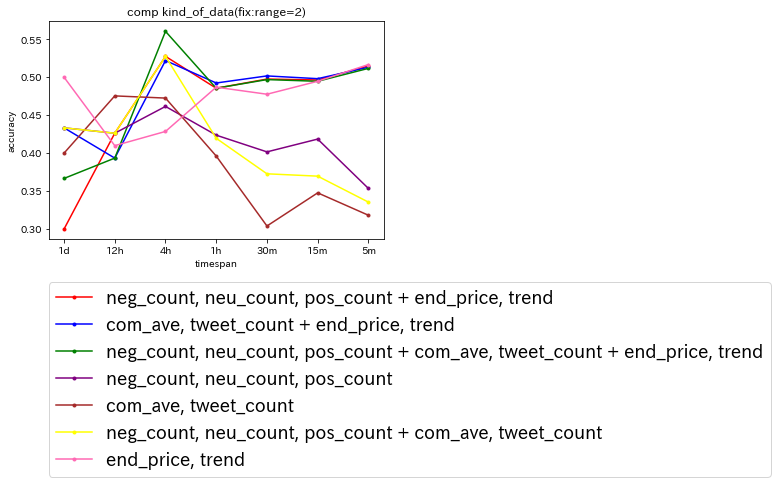

In [23]:
# kind_of_dataの比較
# 縦軸：accuracy, 横軸：timspan ,定数：data_tange
# 縦軸：accuracy, 横軸：data_range ,定数：timespan
df_list=[]
klist = ['neg_count, neu_count, pos_count + end_price, trend',
         'com_ave, tweet_count + end_price, trend',
         'neg_count, neu_count, pos_count + com_ave, tweet_count + end_price, trend',
         'neg_count, neu_count, pos_count',
         'com_ave, tweet_count',
         'neg_count, neu_count, pos_count + com_ave, tweet_count',
         'end_price, trend']

df = pd.read_csv('tweet-svm/svm2_log.csv',usecols=['timespan','kind_of_data','accuracy','range_of_data'])
df = df.query('range_of_data == 2')
df = df.drop(columns=['range_of_data'])
for kind in klist:
    df_list.append(df.groupby("kind_of_data").get_group(f'{kind}'))

#1つ目の表示するデータを用意

k=0
x = df_list[k]['timespan']
y1 = df_list[k]['accuracy']
y2 = df_list[k+1]['accuracy']
y3 = df_list[k+2]['accuracy']
y4 = df_list[k+3]['accuracy']
y5 = df_list[k+4]['accuracy']
y6 = df_list[k+5]['accuracy']
y7 = df_list[k+6]['accuracy']

plt.plot(x, y1,label="neg_count, neu_count, pos_count + end_price, trend", color = 'red', marker = '.')
plt.plot(x, y2,label="com_ave, tweet_count + end_price, trend", color = 'blue', marker = '.')
plt.plot(x, y3,label="neg_count, neu_count, pos_count + com_ave, tweet_count + end_price, trend", color = 'green', marker = '.')
plt.plot(x, y4,label="neg_count, neu_count, pos_count", color = 'purple', marker = '.')
plt.plot(x, y5,label="com_ave, tweet_count", color = 'brown', marker = '.')
plt.plot(x, y6,label="neg_count, neu_count, pos_count + com_ave, tweet_count", color = 'yellow', marker = '.')
plt.plot(x, y7,label="end_price, trend", color = 'hotpink', marker = '.')

plt.xlabel("timespan")
plt.ylabel("accuracy")
plt.title("comp kind_of_data(fix:range=2)")

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
#下表示
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=18)

#グラフ表示
plt.show()

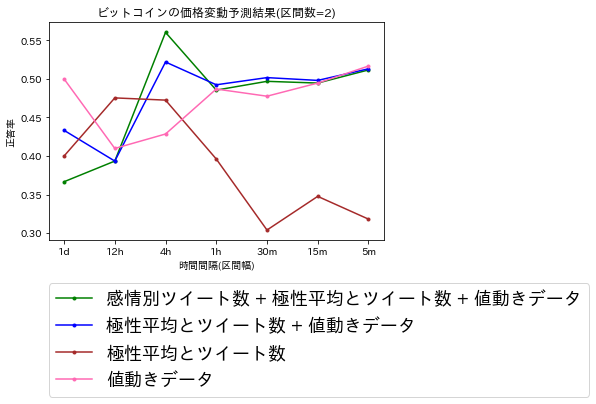

In [22]:
# kind_of_dataの比較
# 縦軸：accuracy, 横軸：timspan ,定数：data_tange
# 縦軸：accuracy, 横軸：data_range ,定数：timespan
df_list=[]
klist = ['neg_count, neu_count, pos_count + end_price, trend',
         'com_ave, tweet_count + end_price, trend',
         'neg_count, neu_count, pos_count + com_ave, tweet_count + end_price, trend',
         'neg_count, neu_count, pos_count',
         'com_ave, tweet_count',
         'neg_count, neu_count, pos_count + com_ave, tweet_count',
         'end_price, trend']

df = pd.read_csv('tweet-svm/svm2_log.csv',usecols=['timespan','kind_of_data','accuracy','range_of_data'])
df = df.query('range_of_data == 2')
df = df.drop(columns=['range_of_data'])
for kind in klist:
    df_list.append(df.groupby("kind_of_data").get_group(f'{kind}'))

#1つ目の表示するデータを用意

k=0
x = df_list[k]['timespan']
y2 = df_list[k+1]['accuracy']
y3 = df_list[k+2]['accuracy']
y5 = df_list[k+4]['accuracy']
y7 = df_list[k+6]['accuracy']

plt.plot(x, y3,label="感情別ツイート数 + 極性平均とツイート数 + 値動きデータ", color = 'green', marker = '.')
plt.plot(x, y2,label="極性平均とツイート数 + 値動きデータ", color = 'blue', marker = '.')
plt.plot(x, y5,label="極性平均とツイート数", color = 'brown', marker = '.')
plt.plot(x, y7,label="値動きデータ", color = 'hotpink', marker = '.')

plt.xlabel("時間間隔(区間幅)")
plt.ylabel("正答率")
plt.title("ビットコインの価格変動予測結果(区間数=2)")

#下表示
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=18)
#右表示
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

#グラフ表示
plt.show()

In [7]:
print(df_list)

[   timespan                                       kind_of_data  accuracy
7        1d  neg_count, neu_count, pos_count + end_price, t...  0.300000
8       12h  neg_count, neu_count, pos_count + end_price, t...  0.426230
9        4h  neg_count, neu_count, pos_count + end_price, t...  0.527473
10       1h  neg_count, neu_count, pos_count + end_price, t...  0.485517
11      30m  neg_count, neu_count, pos_count + end_price, t...  0.497588
12      15m  neg_count, neu_count, pos_count + end_price, t...  0.496381
13       5m  neg_count, neu_count, pos_count + end_price, t...  0.514877,    timespan                             kind_of_data  accuracy
77       1d  com_ave, tweet_count + end_price, trend  0.433333
78      12h  com_ave, tweet_count + end_price, trend  0.393443
79       4h  com_ave, tweet_count + end_price, trend  0.521978
80       1h  com_ave, tweet_count + end_price, trend  0.492414
81      30m  com_ave, tweet_count + end_price, trend  0.501723
82      15m  com_ave, tweet_count + 